In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [37]:
df=pd.read_csv('GOOGLE Stock Data set - GOOGLE Stock Data set.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [41]:
data=df['Close'].values.reshape(-1,1)

In [43]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [50]:
def create_dataset(data,time_step=60):
    X,y=[],[]
    for i in range(time_step,len(data)):
        X.append(data[i-time_step:i,0])
        y.append(data[i,0])
    return np.array(X),np.array(y)
time_step=60
X,y=create_dataset(scaled_data,time_step)
X=X.reshape(X.shape[0],X.shape[1],1)

In [52]:
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [56]:
model=Sequential()
model.add(SimpleRNN(50,return_sequences=False,input_shape=(time_step,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\Sakshi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3432e-05
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4180e-05
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1922e-05
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8946e-05
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9331e-05
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9406e-05
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2299e-05
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6556e-05
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5483e-05
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0834e-05
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0742e-05
Epoch 13/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3761e-05
Epoch 14/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7107e-05
Epoch

In [64]:
y_pred=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_scaled=scaler.inverse_transform(y_test.reshape(-1,1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


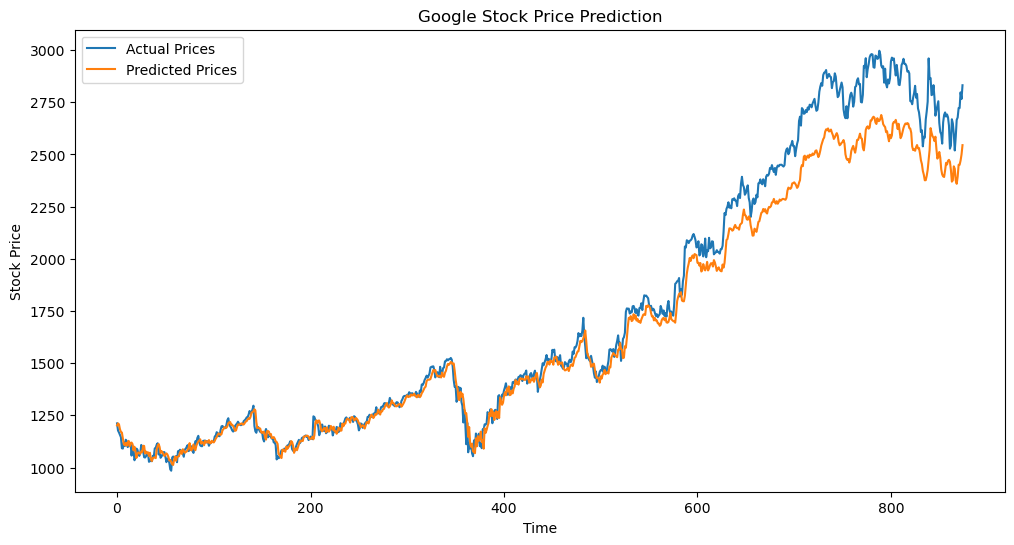

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test_scaled,label='Actual Prices')
plt.plot(y_pred,label='Predicted Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()